<a href="https://colab.research.google.com/github/Antony359/Cognorise-Infotech/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
dfTrain=pd.read_csv('/content/train.csv')
dfTrain

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81
...,...,...,...,...,...,...,...,...,...
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82


In [3]:
dfTrain.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [4]:
dfTrain.tail()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82
31998,EXA031999,none,male,some high school,standard,Section C,51,92,82


In [5]:
#checking columns and rows count

In [6]:
#checking for missing values
dfTrain.isna().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

DATA_VISUALIZATION OF TRAINING DATA (EDA)

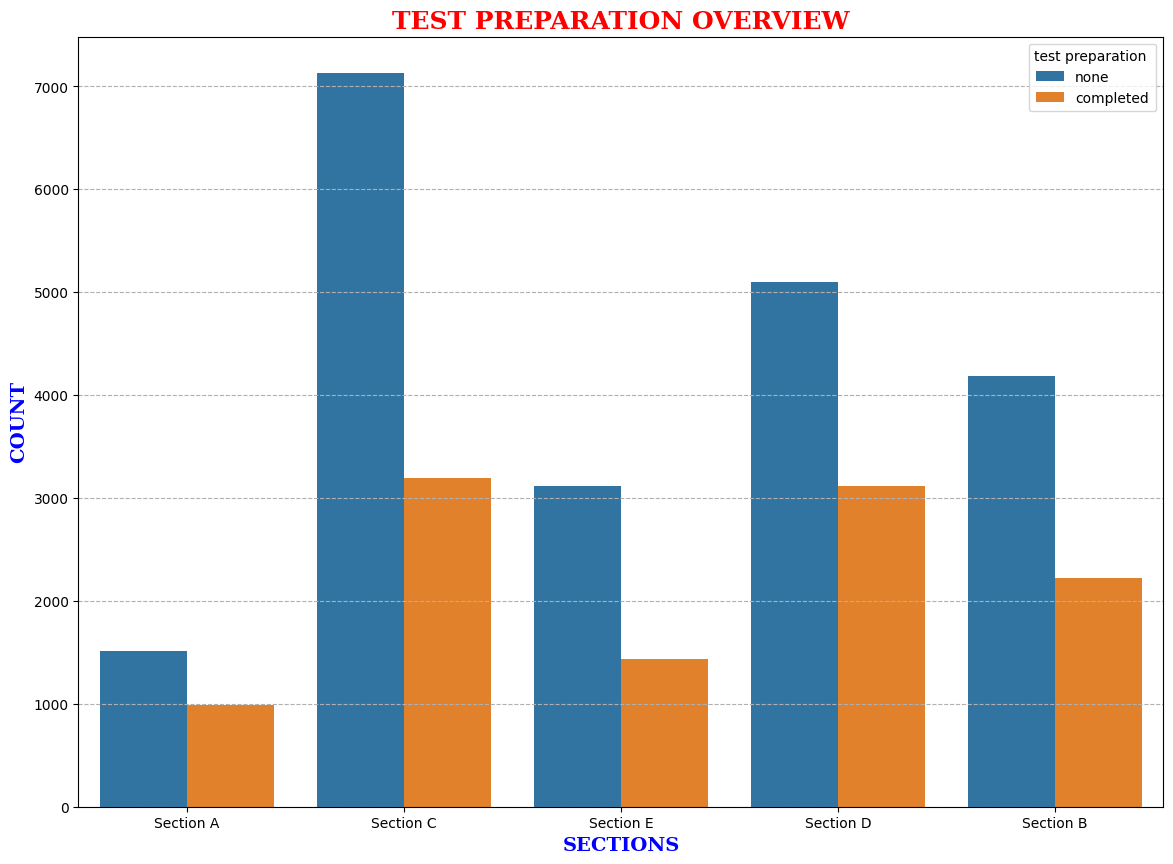

In [7]:
plt.figure(figsize=(14,10))
sns.countplot(x='Section',data=dfTrain,hue='test preparation ')
plt.xlabel('SECTIONS',color='b',fontsize=14,family='serif',weight='bold')
plt.ylabel('COUNT',color='b',fontsize=14,family='serif',weight='bold')
plt.title('TEST PREPARATION OVERVIEW',color='r',fontsize=18,family='serif',weight='bold')
plt.grid(axis='y',linestyle='--')

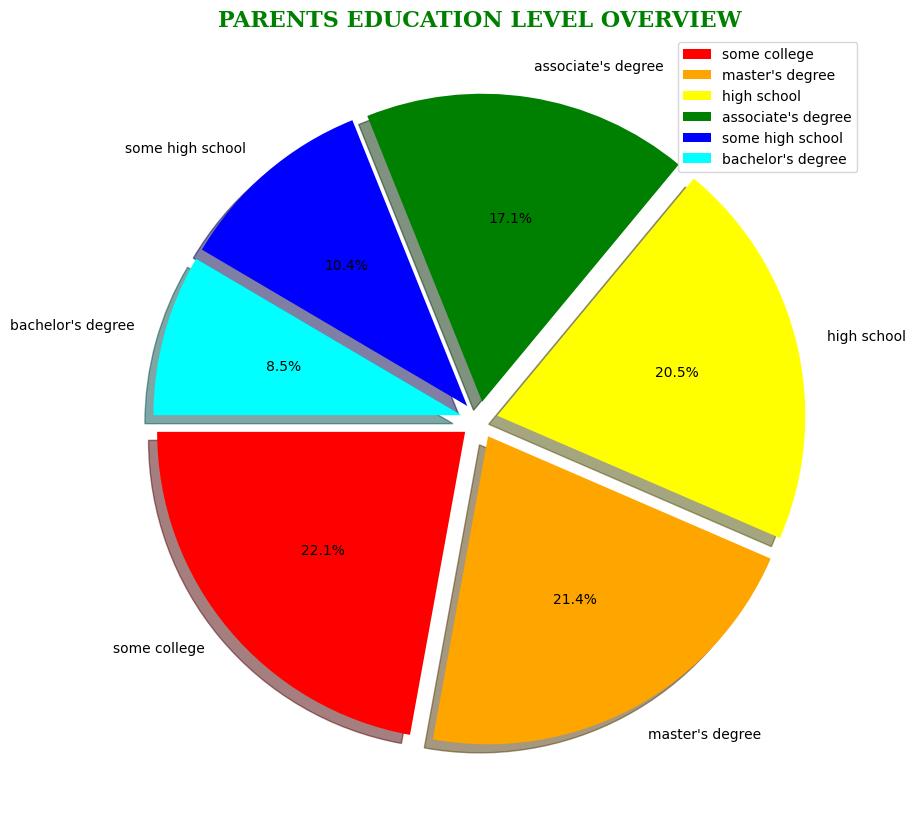

In [8]:
plt.figure(figsize=(14,10))
x=dfTrain['parental level of education'].value_counts()
y=dfTrain['parental level of education'].unique()
explode =[0.06] * len(x)
plt.pie(x,labels=y,autopct='%1.1f%%',shadow=True,explode=explode,startangle=180,colors=['red','orange','yellow','green','blue','cyan'])
plt.title('PARENTS EDUCATION LEVEL OVERVIEW',color='g',fontsize=16,family='serif',weight='bold')
plt.legend()

Text(0.5, 1.0, 'EXAM SCORE OVERVIEW')

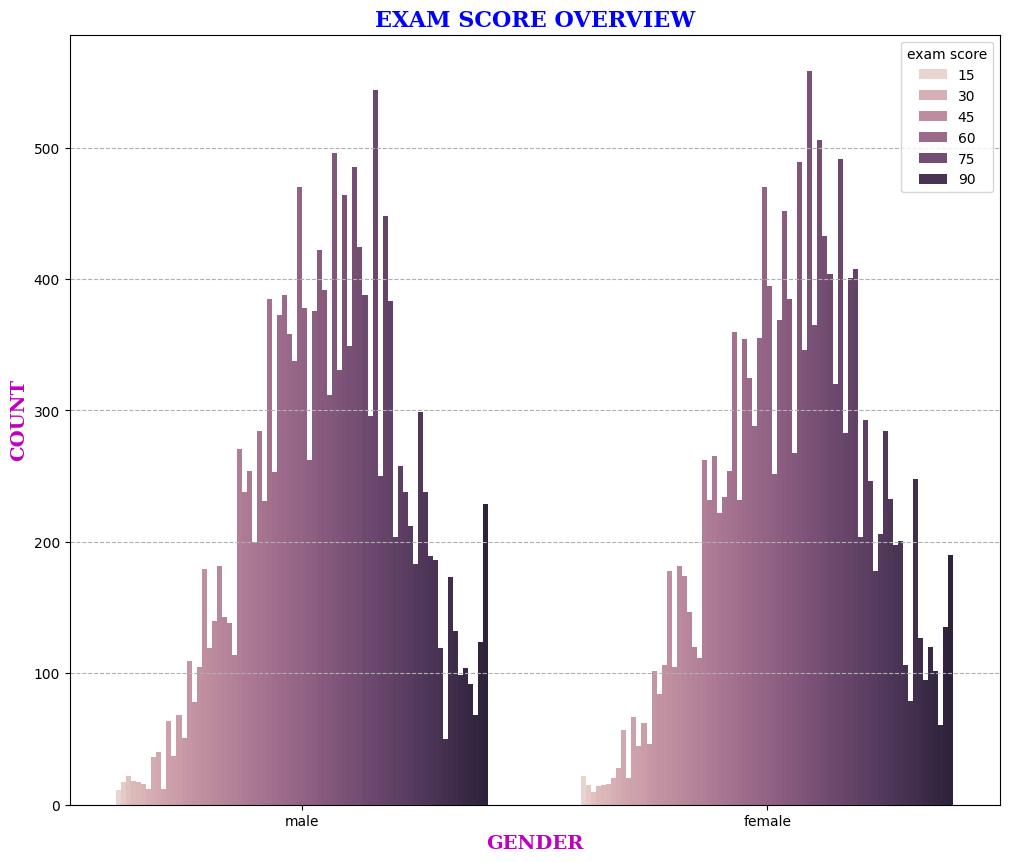

In [9]:
plt.figure(figsize=(12,10))
sns.countplot(x='gender',data=dfTrain,hue='exam score')
plt.grid(axis='y',linestyle='--')
plt.xlabel('GENDER',color='m',fontsize=14,family='serif',weight='bold')
plt.ylabel('COUNT',color='m',fontsize=14,family='serif',weight='bold')
plt.title('EXAM SCORE OVERVIEW',color='b',fontsize=16,family='serif',weight='bold')

PREPROCESSING-TRAINING DATA

In [10]:
#dropping unwanted columns
dfTrain.drop(['lunch'],axis=1,inplace=True)
dfTrain

,Roll no,test preparation,gender,parental level of education,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,Section A,70,73,70
1,EXA000002,none,male,master's degree,Section C,55,54,52
2,EXA000003,none,male,master's degree,Section E,56,46,43
3,EXA000004,none,female,some college,Section C,35,47,41
4,EXA000005,none,female,high school,Section C,87,92,81
...,...,...,...,...,...,...,...,...
31994,EXA031995,none,male,some high school,Section E,63,53,80
31995,EXA031996,none,female,high school,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,Section D,75,32,82


In [11]:
#checking the datatypes
dfTrain.dtypes

Roll no                        object
test preparation               object
gender                         object
parental level of education    object
Section                        object
practical score                 int64
viva score                      int64
exam score                      int64
dtype: object

In [12]:
#encoding
lb=LabelEncoder()
dfTrain['test preparation ']=lb.fit_transform(dfTrain['test preparation '])
dfTrain['gender']=lb.fit_transform(dfTrain['gender'])
dfTrain['parental level of education']=lb.fit_transform(dfTrain['parental level of education'])
dfTrain['Section']=lb.fit_transform(dfTrain['Section'])
dfTrain.dtypes

Roll no                        object
test preparation                int64
gender                          int64
parental level of education     int64
Section                         int64
practical score                 int64
viva score                      int64
exam score                      int64
dtype: object

<Axes: >

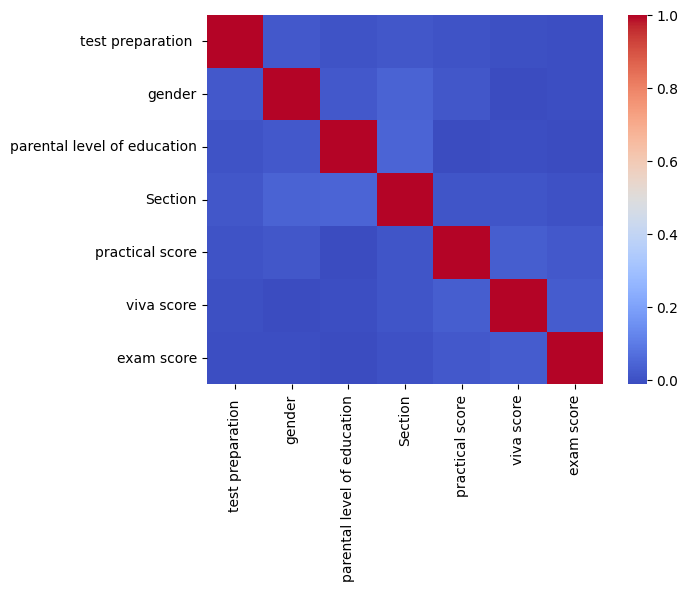

In [13]:
sns.heatmap(dfTrain.corr(numeric_only=True),cmap='coolwarm')

In [14]:
df_test=pd.read_csv('/content/test.csv')
df_test

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62
...,...,...,...,...,...,...,...,...
95,EXA32095,none,male,bachelor's degree,standard,Section B,82,84
96,EXA32096,completed,male,associate's degree,free/reduced,Section B,70,58
97,EXA32097,none,male,some college,standard,Section C,76,67
98,EXA32098,completed,male,associate's degree,standard,Section A,62,71


In [15]:
df_test.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [16]:
df_test.tail()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
95,EXA32095,none,male,bachelor's degree,standard,Section B,82,84
96,EXA32096,completed,male,associate's degree,free/reduced,Section B,70,58
97,EXA32097,none,male,some college,standard,Section C,76,67
98,EXA32098,completed,male,associate's degree,standard,Section A,62,71
99,EXA32099,none,male,high school,standard,Section B,58,67


In [17]:
#checking columns and rows count
df_test.shape

(100, 8)

In [18]:
#checking the datatypes
df_test.dtypes

Roll no                        object
test preparation               object
gender                         object
parental level of education    object
lunch                          object
Section                        object
practical score                 int64
viva score                      int64
dtype: object

In [19]:
#checking for missing values
df_test.isna().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
dtype: int64

DATA_VISUALIZATION OF TESTING DATA (EDA)

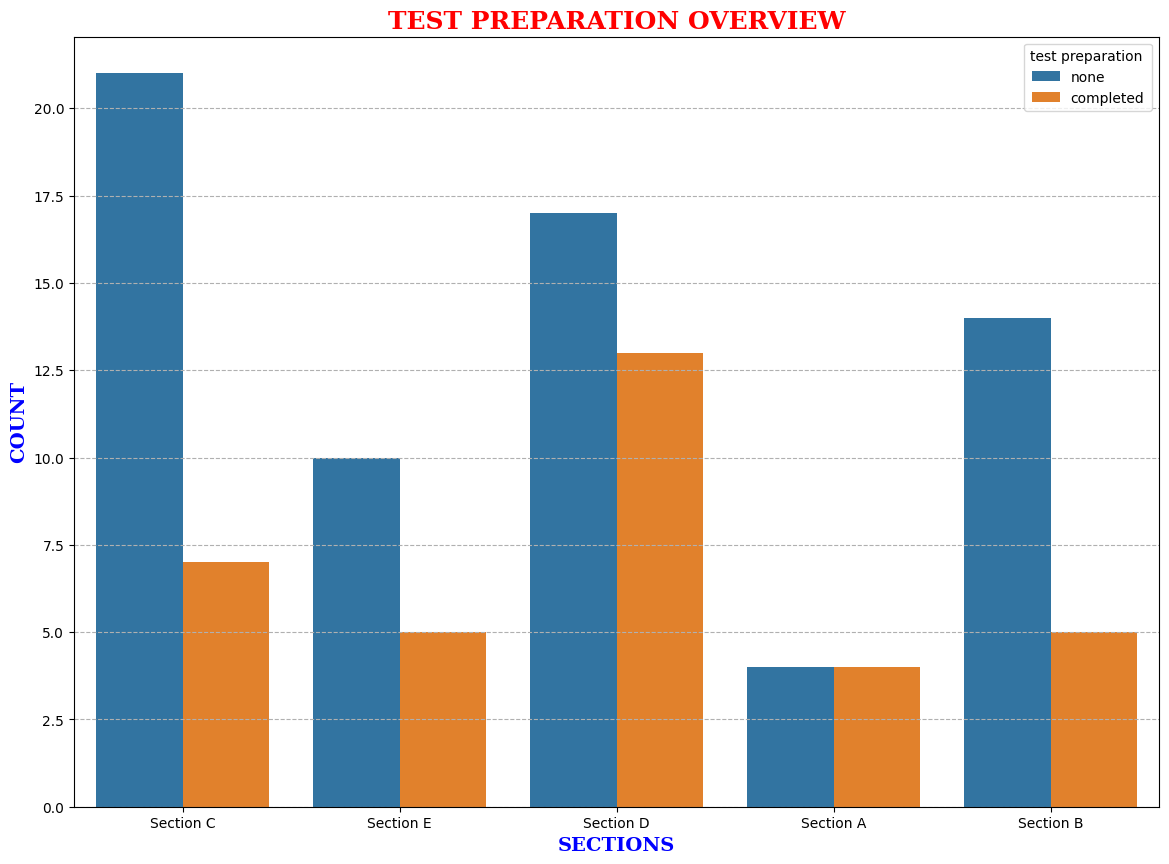

In [20]:
plt.figure(figsize=(14,10))
sns.countplot(x='Section',data=df_test,hue='test preparation ')
plt.xlabel('SECTIONS',color='b',fontsize=14,family='serif',weight='bold')
plt.ylabel('COUNT',color='b',fontsize=14,family='serif',weight='bold')
plt.title('TEST PREPARATION OVERVIEW',color='r',fontsize=18,family='serif',weight='bold')
plt.grid(axis='y',linestyle='--')

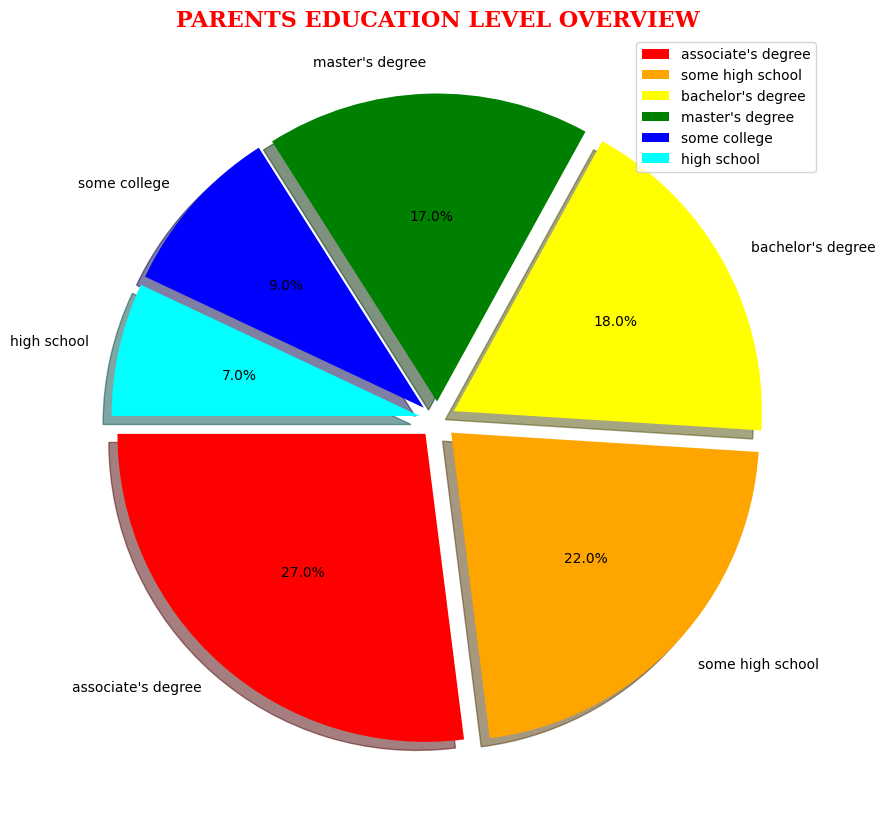

In [21]:
plt.figure(figsize=(14,10))
x=df_test['parental level of education'].value_counts()
y=df_test['parental level of education'].unique()
explode =[0.06] * len(x)
plt.pie(x,labels=y,autopct='%1.1f%%',shadow=True,explode=explode,startangle=180,colors=['red','orange','yellow','green','blue','cyan'])
plt.title('PARENTS EDUCATION LEVEL OVERVIEW',color='r',fontsize=16,family='serif',weight='bold')
plt.legend()

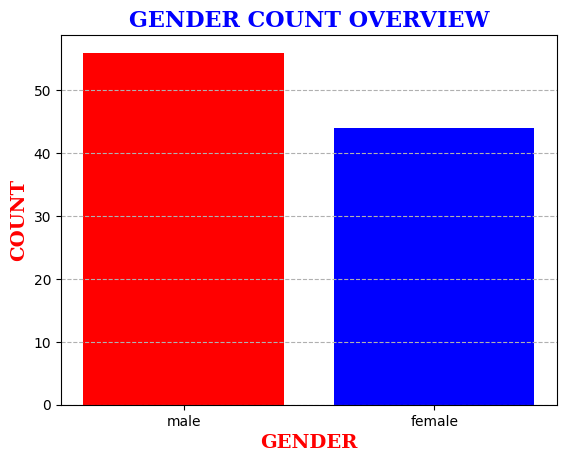

In [22]:
x=df_test['gender'].unique()
y=df_test['gender'].value_counts()
plt.bar(x,y,color=['red','blue'])
plt.xlabel('GENDER',color='r',fontsize=14,family='serif',weight='bold')
plt.ylabel('COUNT',color='r',fontsize=14,family='serif',weight='bold')
plt.title('GENDER COUNT OVERVIEW',color='b',fontsize=16,family='serif',weight='bold')
plt.grid(axis='y',linestyle='--')

PREPROCESSING-TESTING DATA

In [23]:
#dropping unwanted columns
df_test.drop(['lunch'],axis=1,inplace=True)
df_test


,Roll no,test preparation,gender,parental level of education,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,Section C,74,89
1,EXA32001,completed,male,some high school,Section E,66,75
2,EXA32002,none,male,some high school,Section C,52,55
3,EXA32003,completed,male,some high school,Section D,69,85
4,EXA32004,none,female,bachelor's degree,Section E,46,62
...,...,...,...,...,...,...,...
95,EXA32095,none,male,bachelor's degree,Section B,82,84
96,EXA32096,completed,male,associate's degree,Section B,70,58
97,EXA32097,none,male,some college,Section C,76,67
98,EXA32098,completed,male,associate's degree,Section A,62,71


In [24]:
#checking the datatypes
df_test.dtypes

Roll no                        object
test preparation               object
gender                         object
parental level of education    object
Section                        object
practical score                 int64
viva score                      int64
dtype: object

In [25]:
#encoding
df_test['test preparation ']=lb.fit_transform(df_test['test preparation '])
df_test['gender']=lb.fit_transform(df_test['gender'])
df_test['parental level of education']=lb.fit_transform(df_test['parental level of education'])
df_test['Section']=lb.fit_transform(df_test['Section'])
df_test.dtypes


Roll no                        object
test preparation                int64
gender                          int64
parental level of education     int64
Section                         int64
practical score                 int64
viva score                      int64
dtype: object

<Axes: >

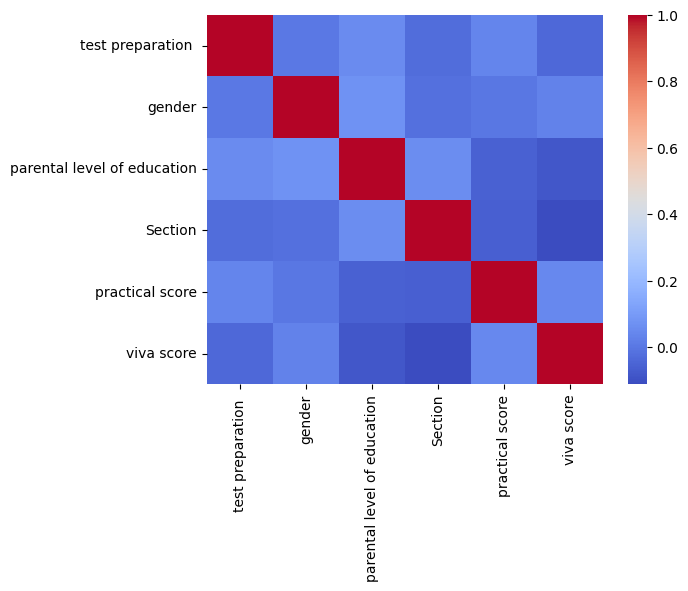

In [26]:
sns.heatmap(df_test.corr(numeric_only=True),cmap='coolwarm')

X,Y SEPARATION

In [27]:
x=dfTrain.drop(['Roll no','exam score'],axis=1)
x

,test preparation,gender,parental level of education,Section,practical score,viva score
0,1,1,4,0,70,73
1,1,1,3,2,55,54
2,1,1,3,4,56,46
3,1,0,4,2,35,47
4,1,0,2,2,87,92
...,...,...,...,...,...,...
31994,1,1,5,4,63,53
31995,1,0,2,1,100,80
31996,1,1,1,1,62,61
31997,1,1,0,3,75,32


In [28]:
y=dfTrain['exam score']
y

0        70
1        52
2        43
3        41
4        81
         ..
31994    80
31995    68
31996    74
31997    82
31998    82
Name: exam score, Length: 31999, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.30,random_state=2)


NORMALIZATION

In [30]:
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_val=scalar.transform(x_val)

MODEL SELECTION AND PERFORMANCE EVALUATION

In [31]:
#Using the best classifier(randomforest) model for more accurate output
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_val)
y_pred

array([92, 72, 67, ..., 53, 73, 60])

In [32]:
#performance evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_val,y_pred)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 1],
       [0, 0, 0, ..., 0, 6, 1],
       [0, 0, 2, ..., 0, 0, 7]])

In [33]:
Score=accuracy_score(y_val,y_pred)
Score

0.08614583333333334

In [34]:
#normalization
scalar.fit_transform(x)
z=scalar.transform(df_test.drop(['Roll no'],axis=1))
z

array([[ 0.72216055,  1.00197075, -1.42200854, -0.1619244 ,  0.40448244,
         1.32160891],
       [-1.38473363,  1.00197075,  1.39250796,  1.58914653, -0.12080834,
         0.3281758 ],
       [ 0.72216055,  1.00197075,  1.39250796, -0.1619244 , -1.04006721,
        -1.09101435],
       [-1.38473363,  1.00197075,  1.39250796,  0.71361107,  0.0761757 ,
         1.03777088],
       [ 0.72216055, -0.99803312, -0.85910524,  1.58914653, -1.43403529,
        -0.5942978 ],
       [ 0.72216055, -0.99803312, -0.85910524, -1.91299534,  0.40448244,
        -0.73621681],
       [ 0.72216055,  1.00197075,  0.26670136,  0.71361107,  2.11167747,
         0.04433777],
       [-1.38473363, -0.99803312,  0.26670136,  0.71361107,  0.99543456,
        -0.38141927],
       [ 0.72216055,  1.00197075,  1.39250796,  0.71361107,  0.92977322,
        -1.44581189],
       [-1.38473363,  1.00197075, -1.42200854,  0.71361107, -0.64609912,
         0.75393285],
       [ 0.72216055, -0.99803312,  1.39250796, -0.

In [35]:
#predicting the output
pred=model.predict(z)

In [36]:
#converting the output into csv file
result=pd.DataFrame({'Roll.no ':df_test['Roll no'],
                     'predicted exam score':pred})
result.to_csv('prediction.csv',index=False)
print(result)

    Roll.no   predicted exam score
0   EXA32000                    76
1   EXA32001                    83
2   EXA32002                    69
3   EXA32003                    79
4   EXA32004                    76
..       ...                   ...
95  EXA32095                    78
96  EXA32096                    58
97  EXA32097                    58
98  EXA32098                    98
99  EXA32099                    94

[100 rows x 2 columns]
